<a href="https://colab.research.google.com/github/jberardini2/Covariance-Matrix-and-Heatmap/blob/main/Covariance_Matrix_Heatmap_with_MLB_Standings_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Covariance Matrix using MLB Standings Data

Modeled After: 
## https://pub.towardsai.net/covariance-matrix-visualization-using-seaborns-heatmap-plot-64332b6c90c5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collected

I gathered data from MLB standings for 2022. I selected the best and the worst teams and recorded the following for 12 teams. The object is to determine which stats correlate with each other by evaluation the covariance matrix.

  RD        = Run Differntial

  AW        = Number of wins on the road

  W500      = Number of wins against over 500 teams

  WVL       = Wins versus lefties

  W1RUN     = Number of wins in 1 run games

  Total1RUN = Total number of 1 run games

  WID       = Number of wins in division

In [2]:
df_mlb = pd.read_csv('MLB Data for PCA5.csv')
df_mlb.head(2) # display the first 2 rows to verify import.

,Team,Yankees,Royals,Tigers,Astros,As,Mets,Braves,Nats,Cards,Reds,Pirates,Dodgers
0,RD,209,-167,-162,203,-191,151,171,-213,129,-124,-214,332
1,AW,38,24,25,47,30,44,41,27,36,29,27,52


## Transposing or switching column names for row names for the covariance matrix.

In [3]:
df_mlb = pd.DataFrame(df_mlb.T).reset_index(0)

In [4]:
df_mlb

,index,0,1,2,3,4,5,6
0,Team,RD,AW,W500,WVL,W1RUN,Total1RUN,WID
1,Yankees,209,38,47,24,27,51,40
2,Royals,-167,24,29,19,14,31,28
3,Tigers,-162,25,25,19,17,35,26
4,Astros,203,47,34,38,25,41,51
5,As,-191,30,28,13,13,36,24
6,Mets,151,44,40,28,20,35,46
7,Braves,171,41,31,34,23,38,39
8,Nats,-213,27,25,16,15,36,13
9,Cards,129,36,27,23,23,38,44


In [5]:
print (df_mlb.iloc[0])

index         Team
0               RD
1               AW
2             W500
3              WVL
4            W1RUN
5        Total1RUN
6              WID
Name: 0, dtype: object


## Prepping data by assigning row 1 as the column headers. ( The stat names.)

In [6]:
# Assign row as column headers
header_row = 0
df_mlb.columns = df_mlb.iloc[header_row]
print(df_mlb)



0      Team    RD  AW  W500  WVL  W1RUN  Total1RUN  WID
0      Team    RD  AW  W500  WVL  W1RUN  Total1RUN  WID
1   Yankees   209  38    47   24     27         51   40
2    Royals  -167  24    29   19     14         31   28
3    Tigers  -162  25    25   19     17         35   26
4    Astros   203  47    34   38     25         41   51
5        As  -191  30    28   13     13         36   24
6      Mets   151  44    40   28     20         35   46
7    Braves   171  41    31   34     23         38   39
8      Nats  -213  27    25   16     15         36   13
9     Cards   129  36    27   23     23         38   44
10     Reds  -124  29    27   17     19         40   25
11  Pirates  -214  27    22   19     19         41   28
12  Dodgers   332  52    31   29     13         26   47


## Deleting the first row since it's been re-assigned as the column headers.

In [7]:
df_mlb.drop(df_mlb.iloc[0].name, inplace=True)
print (df_mlb)


0      Team    RD  AW W500 WVL W1RUN Total1RUN WID
1   Yankees   209  38   47  24    27        51  40
2    Royals  -167  24   29  19    14        31  28
3    Tigers  -162  25   25  19    17        35  26
4    Astros   203  47   34  38    25        41  51
5        As  -191  30   28  13    13        36  24
6      Mets   151  44   40  28    20        35  46
7    Braves   171  41   31  34    23        38  39
8      Nats  -213  27   25  16    15        36  13
9     Cards   129  36   27  23    23        38  44
10     Reds  -124  29   27  17    19        40  25
11  Pirates  -214  27   22  19    19        41  28
12  Dodgers   332  52   31  29    13        26  47


# Creating the Covariance Matrix

In [8]:
cols = ['AW', 'W500', 'WVL', 'W1RUN', 'Total1RUN','WID','RD']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
stdsc = StandardScaler()

In [11]:
X_std = stdsc.fit_transform(df_mlb[cols].iloc[:,range(0,7)].values)

In [12]:
cov_mat =np.cov(X_std.T)

# Creating the Heatmap to evaluate different features

The run differential is showing the most correlation to the other stats. Wins versus lefties, wins in division and the number of away wins is also favorably correlated.

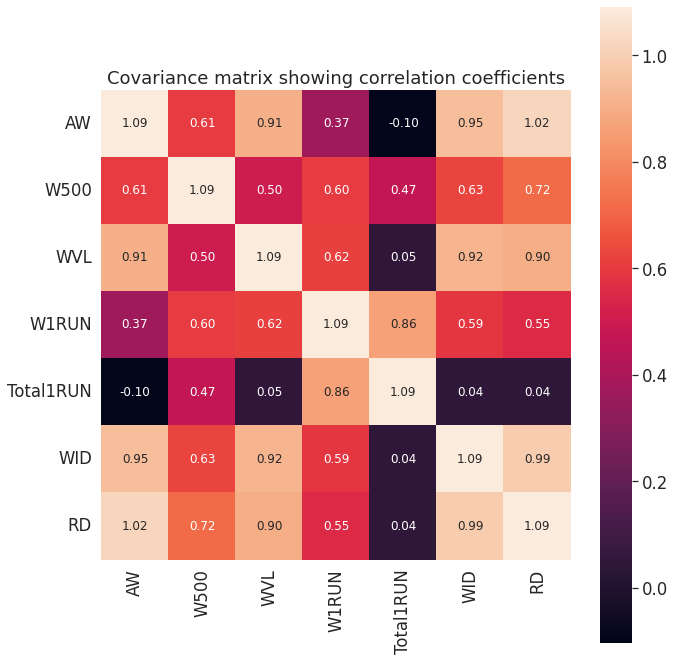

In [13]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [14]:
print (
  "RD        = Run Differntial\n"\
  "AW        = Number of wins on the road\n"\
  "W500      = Number of wins against over 500 teams\n"\
  "WVL       = Wins versus lefties\n"\
  "W1RUN     = Number of wins in 1 run games\n"\
  "Total1RUN = Total number of 1 run games\n"\
  "WID       = Number of wins in division"
  )

RD        = Run Differntial
AW        = Number of wins on the road
W500      = Number of wins against over 500 teams
WVL       = Wins versus lefties
W1RUN     = Number of wins in 1 run games
Total1RUN = Total number of 1 run games
WID       = Number of wins in division


# After evaluation 2 features will be removed. 
1. Number of wins in 1 run games.
2. Total number of 1 run games.

In [15]:
cols_selected = ['AW', 'W500', 'WVL', 'WID','RD', 'Team']


# Four of the features are selected as the predictors (independent variable):
AW, W500, WVL and WID

## The target variable will be RD or run differential.

In [16]:
df_mlb[cols_selected]

,AW,W500,WVL,WID,RD,Team
1,38,47,24,40,209,Yankees
2,24,29,19,28,-167,Royals
3,25,25,19,26,-162,Tigers
4,47,34,38,51,203,Astros
5,30,28,13,24,-191,As
6,44,40,28,46,151,Mets
7,41,31,34,39,171,Braves
8,27,25,16,13,-213,Nats
9,36,27,23,44,129,Cards
10,29,27,17,25,-124,Reds


In [18]:
X = df_mlb[cols_selected].iloc[:,0:4].values    # features matrix  


In [21]:
y = df_mlb[cols_selected]['RD'].values        # target variable

In [22]:
X

array([[38, 47, 24, 40],
       [24, 29, 19, 28],
       [25, 25, 19, 26],
       [47, 34, 38, 51],
       [30, 28, 13, 24],
       [44, 40, 28, 46],
       [41, 31, 34, 39],
       [27, 25, 16, 13],
       [36, 27, 23, 44],
       [29, 27, 17, 25],
       [27, 22, 19, 28],
       [52, 31, 29, 47]], dtype=object)

In [23]:
y

array([209, -167, -162, 203, -191, 151, 171, -213, 129, -124, -214, 332],
      dtype=object)

# From here model building can begin.